In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("paper")

In [2]:
df = pd.read_csv('geyser.csv')

In [3]:
df.drop('Unnamed: 2', inplace=True, axis=1)

#### Data cleaning

In [4]:
df.dtypes

eruptions    object
waiting      object
dtype: object

In [5]:
df.columns = ['eruption_duration', 'time_taken_for_next_geyser']

In [6]:
def is_number(x):
    try:
        float(x)
        return True
    except:
        return False

In [7]:
df[~df.time_taken_for_next_geyser.apply(is_number)]

,eruption_duration,time_taken_for_next_geyser
64,1.817,6O


In [8]:
df.time_taken_for_next_geyser = df.time_taken_for_next_geyser.str.replace('O', '0')

In [9]:
df.time_taken_for_next_geyser = df.time_taken_for_next_geyser.apply(lambda x: float(x))

In [10]:
df[~df.eruption_duration.apply(is_number)]

,eruption_duration,time_taken_for_next_geyser
20,1 800,51.0
57,l.667,64.0


In [11]:
df.eruption_duration = df.eruption_duration.replace('1 800', '1.800')

In [12]:
eruption_temp = df.eruption_duration.drop(57)

In [13]:
eruption_temp.astype('float').max()

41083.0

In [14]:
df_subset = df[(df.time_taken_for_next_geyser > 60.0) & (df.time_taken_for_next_geyser < 70.0)]

In [15]:
df_subset = df_subset.drop(57)

In [16]:
df_subset = df_subset.astype('float')

In [17]:
df_subset.describe()

,eruption_duration,time_taken_for_next_geyser
count,18.000000,18.000000
mean,2.689778,64.500000
std,0.701916,2.229482
min,1.750000,62.000000
25%,2.170500,63.000000
50%,2.441500,64.000000
75%,3.292000,65.750000
max,4.067000,69.000000


In [18]:
df_subset.eruption_duration.max()

4.067

In [19]:
df_subset.eruption_duration.min()

1.75

In [20]:
df.eruption_duration = df.eruption_duration.replace('l.667', '1.667')
df.eruption_duration = df.eruption_duration.apply(lambda x: float(x))

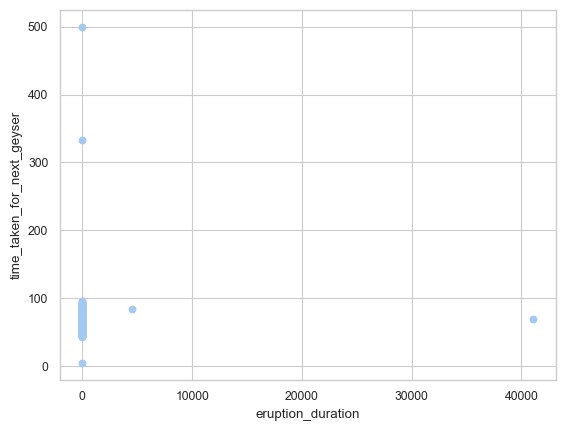

In [21]:
plt.scatter(df.eruption_duration, df.time_taken_for_next_geyser)
plt.xlabel('eruption_duration')
plt.ylabel('time_taken_for_next_geyser')
plt.show()

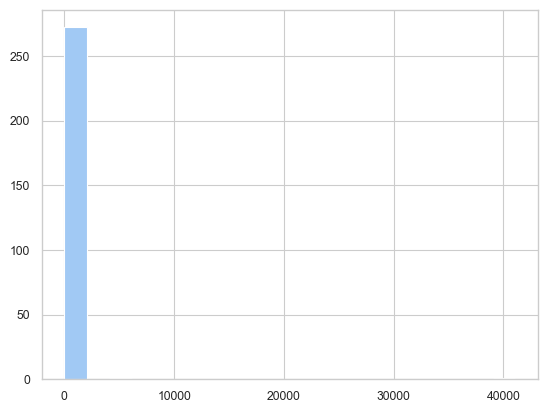

In [22]:
plt.hist(df.eruption_duration, bins=20)
plt.show()

In [23]:
df.eruption_duration.mean()

169.80229197080288

In [24]:
df.eruption_duration.median()

4.0

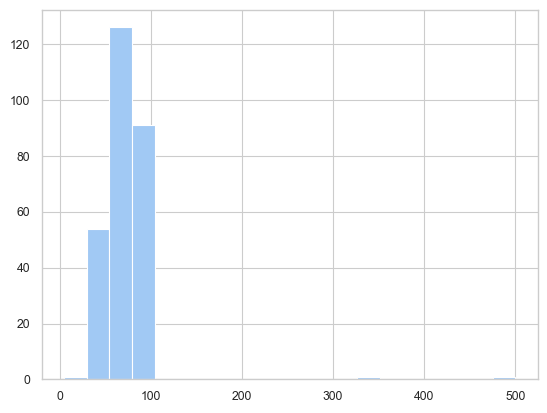

In [25]:
plt.hist(df.time_taken_for_next_geyser, bins=20)
plt.show()

In [26]:
q1 = df.eruption_duration.quantile(0.25)

In [27]:
q3 = df.eruption_duration.quantile(0.75)

In [28]:
iqr = q3 - q1

In [29]:
lower_limit = q1 - 1.5*iqr 

In [30]:
upper_limit = q3 + 1.5*iqr

In [31]:
clean_df = df[(df.eruption_duration >= lower_limit) & (df.eruption_duration  <= upper_limit)]

In [32]:
q1 = df.time_taken_for_next_geyser.quantile(0.25)
q3 = df.time_taken_for_next_geyser.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr 
upper_limit = q3 + 1.5*iqr

In [33]:
clean_df = clean_df[(clean_df.time_taken_for_next_geyser >= lower_limit) & (clean_df.time_taken_for_next_geyser  <= upper_limit)]

#### Analysis

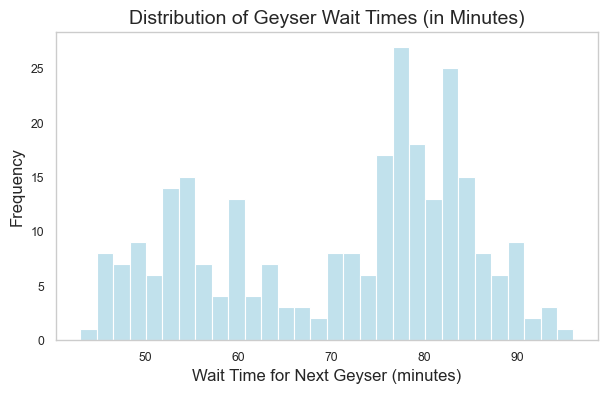

In [34]:
plt.figure(figsize=(7, 4))
sns.set_palette("pastel")
sns.set_context("paper")
sns.histplot(data=clean_df, x='time_taken_for_next_geyser', color='lightblue', bins=30)
plt.xlabel('Wait Time for Next Geyser (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.title('Distribution of Geyser Wait Times (in Minutes)', fontsize=14)
# plt.show()
plt.savefig('./wait_times_dist.png', dpi=300)

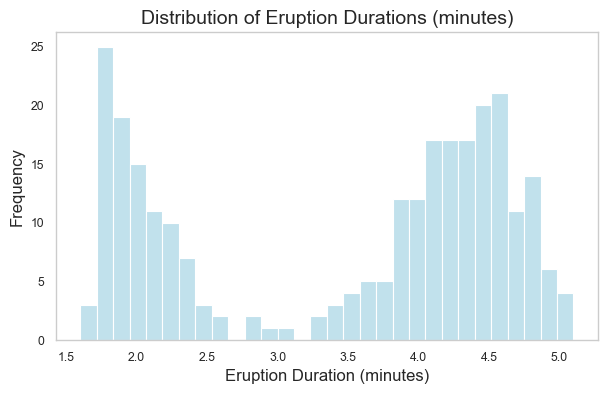

In [35]:
plt.figure(figsize=(7, 4))
sns.set_palette("pastel")
sns.set_context("paper")
sns.histplot(data=clean_df, x='eruption_duration', color='lightblue', bins=30)
plt.xlabel("Eruption Duration (minutes)", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.title('Distribution of Eruption Durations (minutes)', fontsize=14)
plt.savefig('./eruption_duration.png', dpi=300)

In [36]:
clean_df.time_taken_for_next_geyser.describe()

count    269.000000
mean      70.762082
std       13.653327
min       43.000000
25%       58.000000
50%       76.000000
75%       82.000000
max       96.000000
Name: time_taken_for_next_geyser, dtype: float64

In [37]:
clean_df.eruption_duration.describe()

count    269.000000
mean       3.470301
std        1.150581
min        1.600000
25%        2.100000
50%        4.000000
75%        4.450000
max        5.100000
Name: eruption_duration, dtype: float64

#### Bad plot

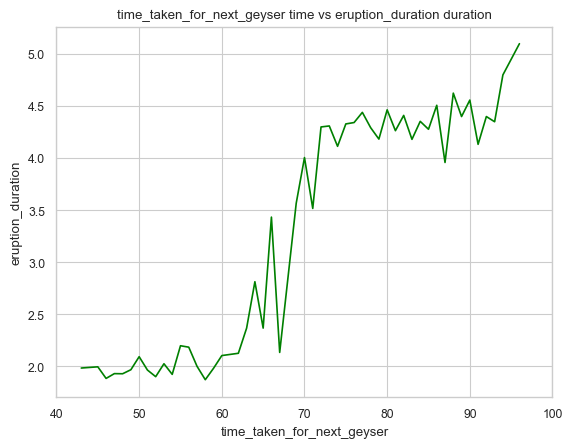

In [77]:
sns.lineplot(data=clean_df, x='time_taken_for_next_geyser', y='eruption_duration', color='green', errorbar=None)
plt.xticks(range(40, 106, 10))
plt.title('time_taken_for_next_geyser time vs eruption_duration duration')
plt.savefig('./intentional bad plot.png', dpi=300)

In [39]:
clean_df.corr()

,eruption_duration,time_taken_for_next_geyser
eruption_duration,1.000000,0.901987
time_taken_for_next_geyser,0.901987,1.000000


#### Parameter estimation

In [40]:
from sklearn.mixture import GaussianMixture

In [41]:
gmm = GaussianMixture(n_components=2)
gmm.fit(clean_df[['eruption_duration']])

GaussianMixture(n_components=2)

In [42]:
gmm.means_

array([[2.01539677],
       [4.28135269]])

In [43]:
gmm.covariances_

array([[[0.05838586]],

       [[0.1838058 ]]])

In [44]:
gmm.bic(clean_df[['eruption_duration']])

572.2309339776111

In [45]:
gmm.aic(clean_df[['eruption_duration']])

554.257377079602

In [46]:
gmm.weights_

array([0.3579291, 0.6420709])

#### Modeling eruption duration

In [47]:
from scipy import stats

In [48]:
mu, sigma = stats.norm.fit(clean_df.time_taken_for_next_geyser)

In [49]:
mu

70.76208178438662

In [50]:
sigma

13.627925249117775

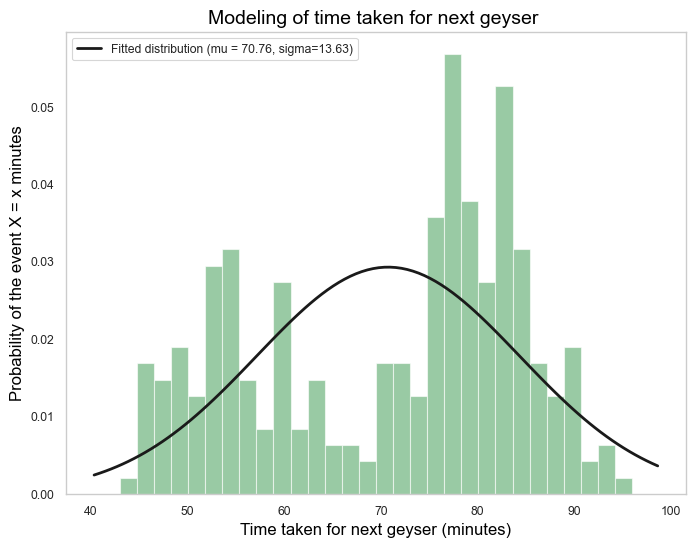

In [51]:
plt.figure(figsize=(8, 6))
plt.hist(clean_df.time_taken_for_next_geyser, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label=f"Fitted distribution (mu = {np.round(mu, 2)}, sigma={np.round(sigma, 2)})")
plt.xlabel('Time taken for next geyser (minutes)', fontsize=12, color='black')
plt.ylabel('Probability of the event X = x minutes', fontsize=12, color='black')
plt.title(f"Modeling of time taken for next geyser ", fontsize=14, color='black')
plt.legend()
plt.grid(False)
plt.show()

### Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [53]:
df_train, df_test = train_test_split(clean_df, test_size=0.2)

In [54]:
x_train, y_train = df_train[['eruption_duration']], df_train[['time_taken_for_next_geyser']]
x_test, y_test = df_test[['eruption_duration']], df_test[['time_taken_for_next_geyser']]

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
r2_score(y_test, lr.predict(x_test))

0.7747001855827708

In [58]:
lr.coef_, lr.intercept_

(array([[10.81573988]]), array([33.09323428]))

/Users/yasodasairamkandikonda/Desktop/Pytorch/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


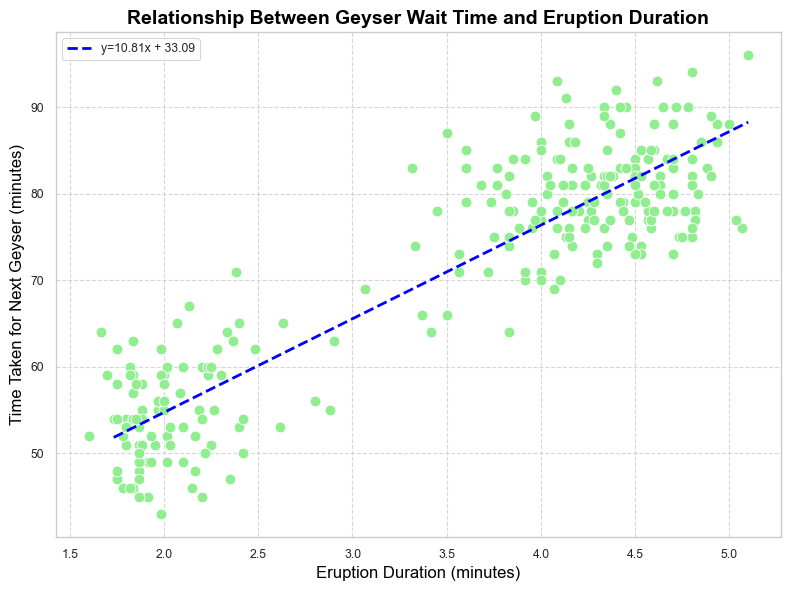

In [66]:
x_t = np.linspace(x_train.min(), x_train.max(), 50).reshape(-1, 1)
sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.set_context("paper")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=clean_df, 
    y='time_taken_for_next_geyser', 
    x='eruption_duration', 
    color='lightgreen', 
    s=60,
    edgecolor='white',
)
plt.plot(x_t, lr.predict(x_t), color='blue', linestyle='--', linewidth=2, label='y=10.81x + 33.09')
plt.title('Relationship Between Geyser Wait Time and Eruption Duration', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Time Taken for Next Geyser (minutes)', fontsize=12, color='black')
plt.xlabel('Eruption Duration (minutes)', fontsize=12, color='black')
# plt.xticks(range(10, 106, 10))
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.legend()
plt.savefig('./scatter_plot.png', dpi=300)